In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn import metrics
plt.style.use("seaborn-v0_8") 

resumeDataSet = pd.read_csv(r'D:\Rsume_Screening\data\UpdatedResumeDataSet.csv', encoding='utf-8')
job_description = pd.read_csv(r'D:\Rsume_Screening\data\job_descriptions.csv', encoding='utf-8')
print(resumeDataSet['Category'].value_counts())
print(resumeDataSet.info())
print("=="*30)

print(job_description.info())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------

In [2]:
job_description.head()
resumeDataSet.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
cols_to_drop = ["Job Id","Job Posting Date", "Benefits", "Role", "location", 
                "Country", "Work Type", "Company Size", "Salary Range"]

df_job = job_description.drop(columns=cols_to_drop)


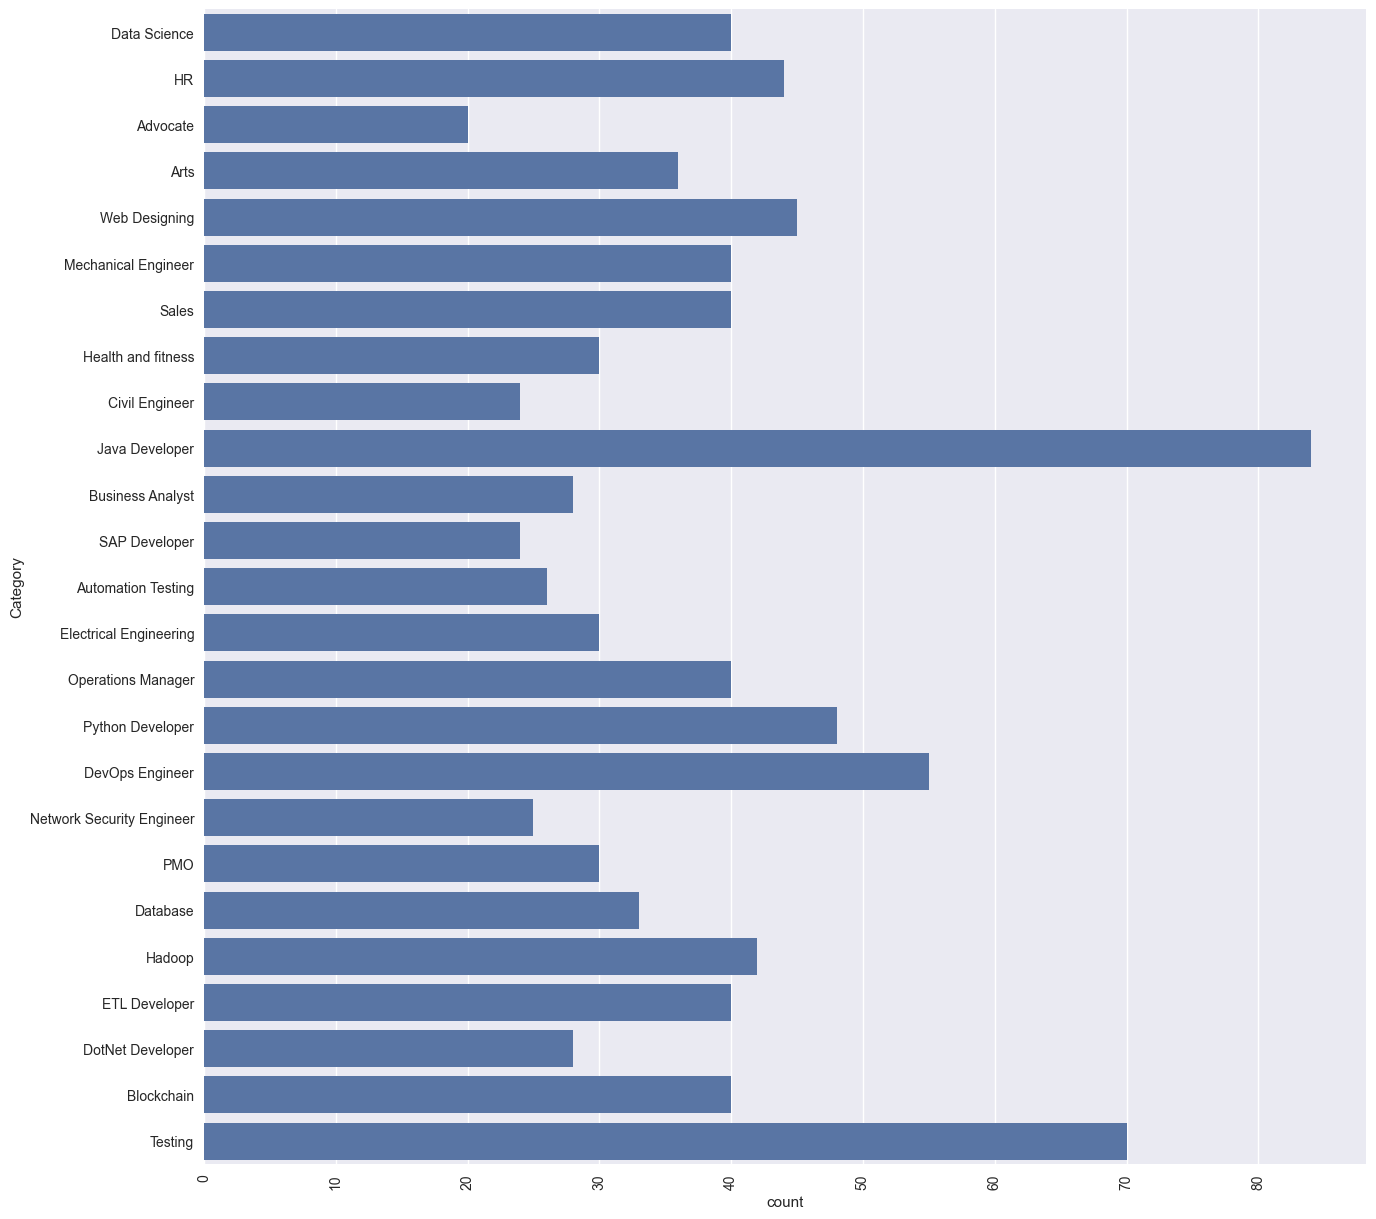

<Figure size 800x550 with 0 Axes>

In [4]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)
plt.show()
plt.savefig(r'D:\Rsume_Screening\image\UpdatedResumeDataSet.png')


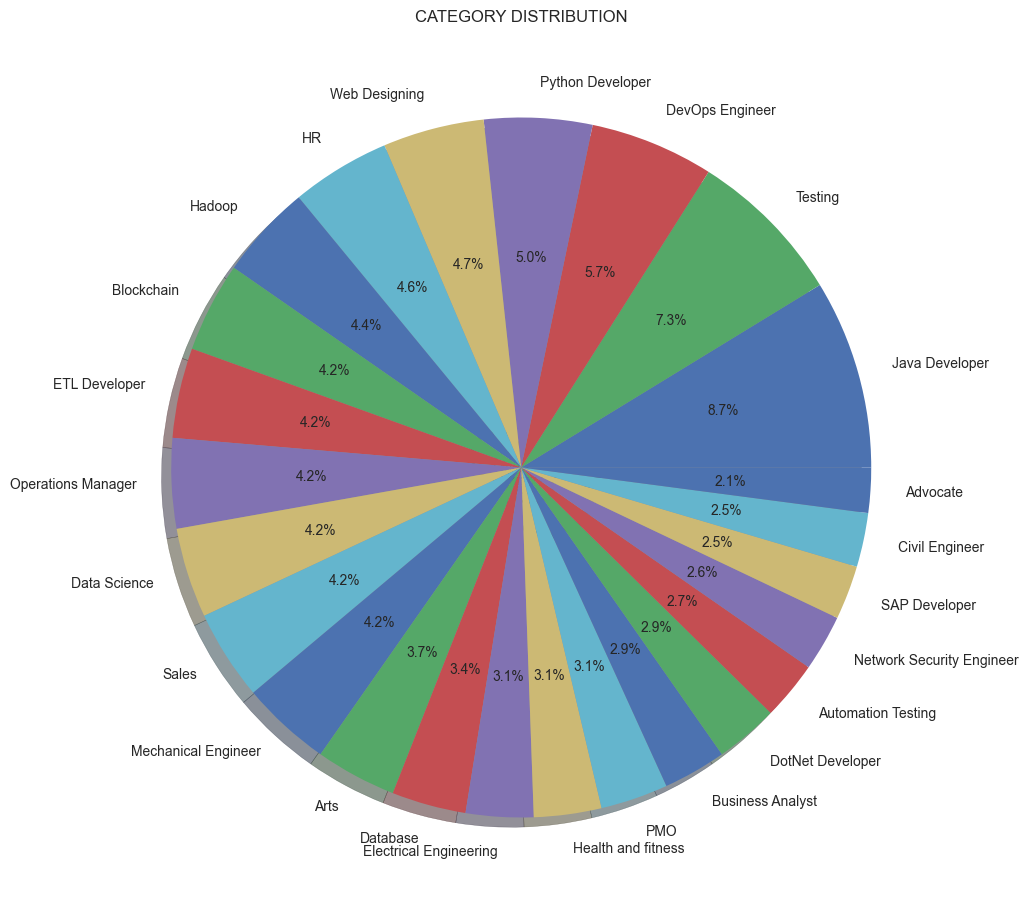

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

resumeDataSet = pd.read_csv(r"D:\Rsume_Screening\data\UpdatedResumeDataSet.csv", encoding='utf-8')
vc = resumeDataSet['Category'].value_counts()

targetLabels  = vc.index     
targetCounts  = vc.values   
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

plt.savefig(r'D:\Rsume_Screening\image\UpdatedResumeDataSet1.png')
plt.show()


In [6]:
print(df_job.shape)
print(df_job.info())


(1615940, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Experience        1615940 non-null  object 
 1   Qualifications    1615940 non-null  object 
 2   latitude          1615940 non-null  float64
 3   longitude         1615940 non-null  float64
 4   Preference        1615940 non-null  object 
 5   Contact Person    1615940 non-null  object 
 6   Contact           1615940 non-null  object 
 7   Job Title         1615940 non-null  object 
 8   Job Portal        1615940 non-null  object 
 9   Job Description   1615940 non-null  object 
 10  skills            1615940 non-null  object 
 11  Responsibilities  1615940 non-null  object 
 12  Company           1615940 non-null  object 
 13  Company Profile   1610462 non-null  object 
dtypes: float64(2), object(12)
memory usage: 172.6+ MB
None


In [7]:
df_job.isnull().sum()

Experience             0
Qualifications         0
latitude               0
longitude              0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Job Portal             0
Job Description        0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

In [8]:
df_job = df_job.drop_duplicates()


In [9]:
df_job.head()

,Experience,Qualifications,latitude,longitude,Preference,Contact Person,Contact,Job Title,Job Portal,Job Description,skills,Responsibilities,Company,Company Profile
0,5 to 15 Years,M.Tech,54.2361,-4.5481,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Snagajob,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,2 to 12 Years,BCA,38.9697,59.5563,Female,Francisco Larsen,461-509-4216,Web Developer,Idealist,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,0 to 12 Years,PhD,22.1987,113.5439,Male,Gary Gibson,9687619505,Operations Manager,Jobs2Careers,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,4 to 11 Years,PhD,9.3077,2.3158,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,1 to 12 Years,MBA,-35.6751,-71.5429,Female,Julie Johnson,343.975.4702x9340,Event Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


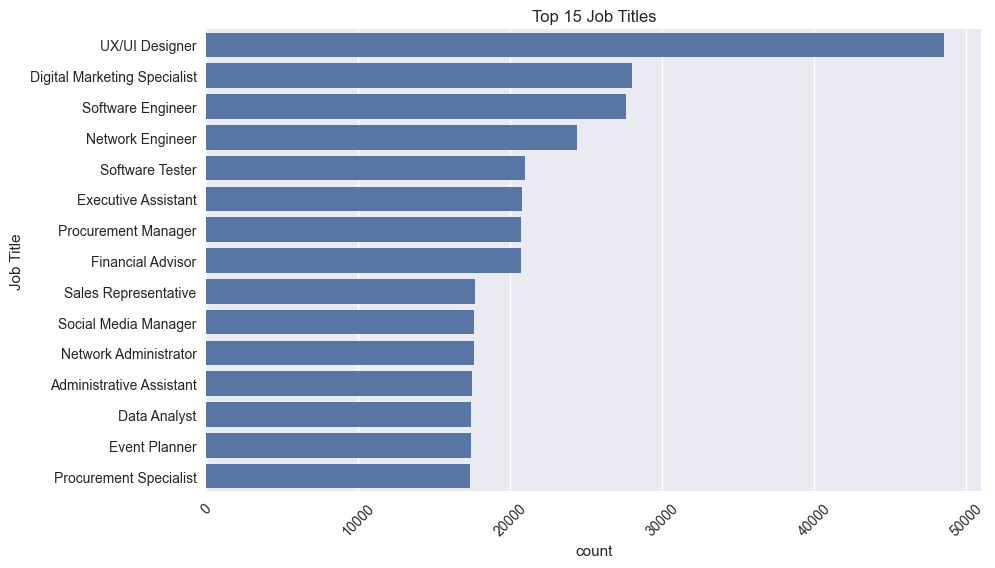

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(y="Job Title", data=df_job, order=df_job['Job Title'].value_counts().nlargest(15).index)
plt.title("Top 15 Job Titles")
plt.xticks(rotation=45)
plt.show()

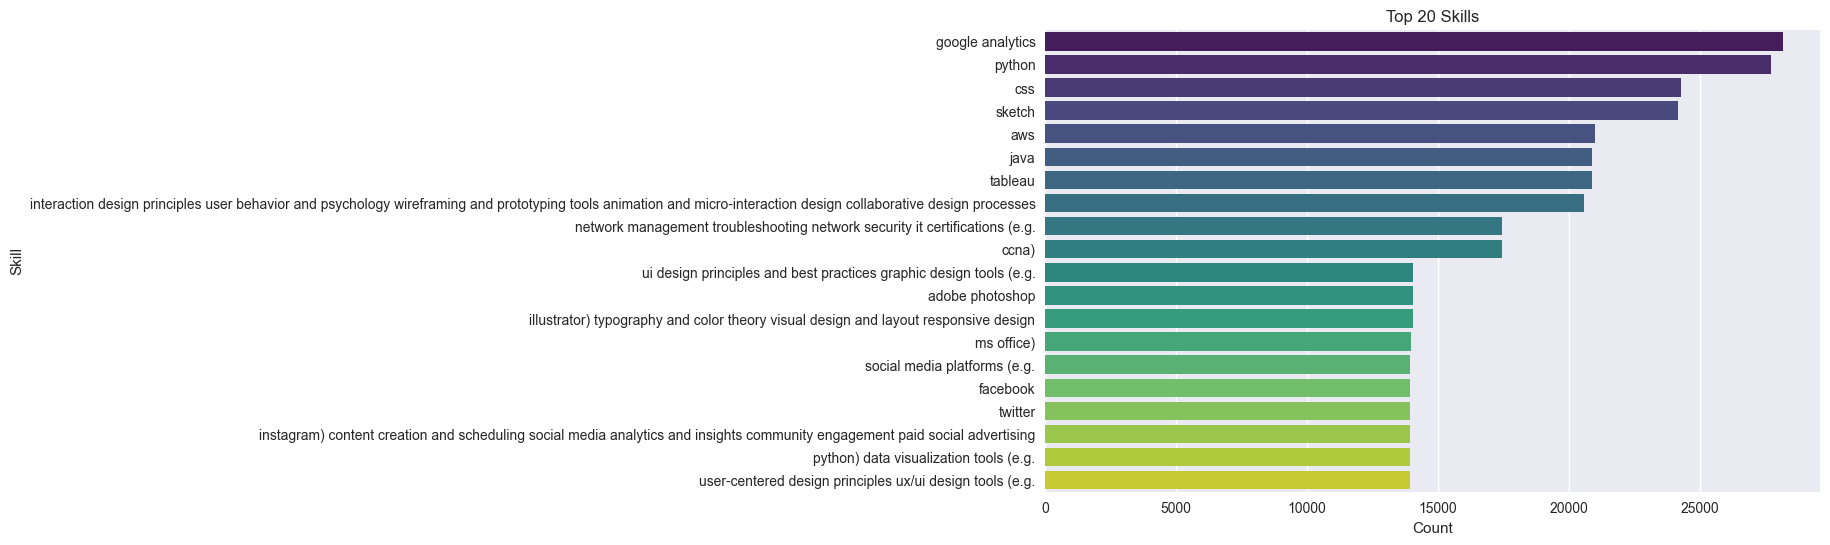

In [11]:
all_skills = df_job['skills'].dropna().str.lower().str.split(',').tolist()
from collections import Counter
flat_skills = [skill.strip() for sublist in all_skills for skill in sublist]

top_skills = Counter(flat_skills).most_common(20)

skills_df = pd.DataFrame(top_skills, columns=['Skill','Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Skill', data=skills_df, palette="viridis")
plt.title("Top 20 Skills")
plt.show()


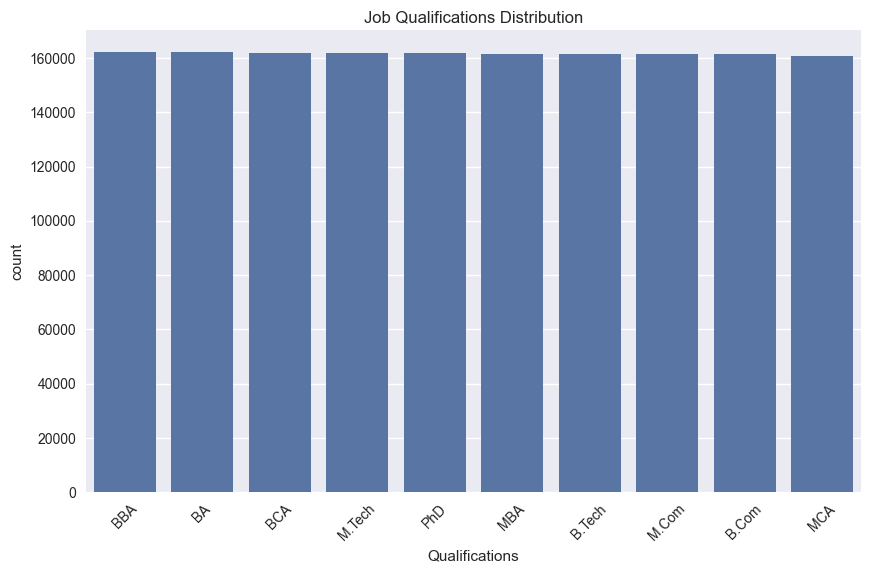

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_job, x="Qualifications", order=df_job["Qualifications"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Job Qualifications Distribution")
plt.show()

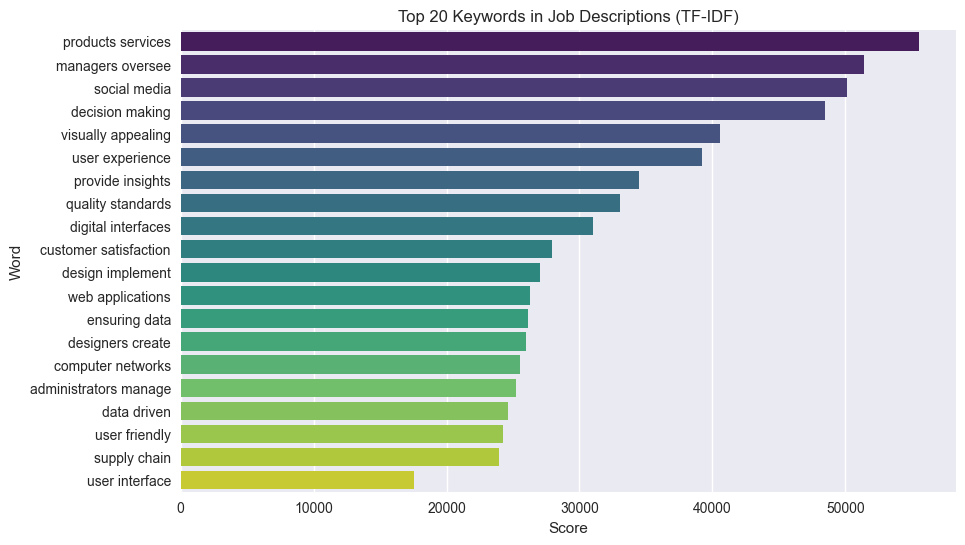

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

descriptions = df_job['Job Description'].dropna().astype(str)

vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(2, 2), max_features=20)
X = vectorizer.fit_transform(descriptions)
top_words = vectorizer.get_feature_names_out()
scores = X.sum(axis=0).A1

tfidf_df = pd.DataFrame({'Word': top_words, 'Score': scores}).sort_values(by="Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Score", y="Word", data=tfidf_df, palette="viridis")
plt.title("Top 20 Keywords in Job Descriptions (TF-IDF)")
plt.show()


In [14]:
df_job["skills"] = df_job["skills"].str.lower().str.strip()


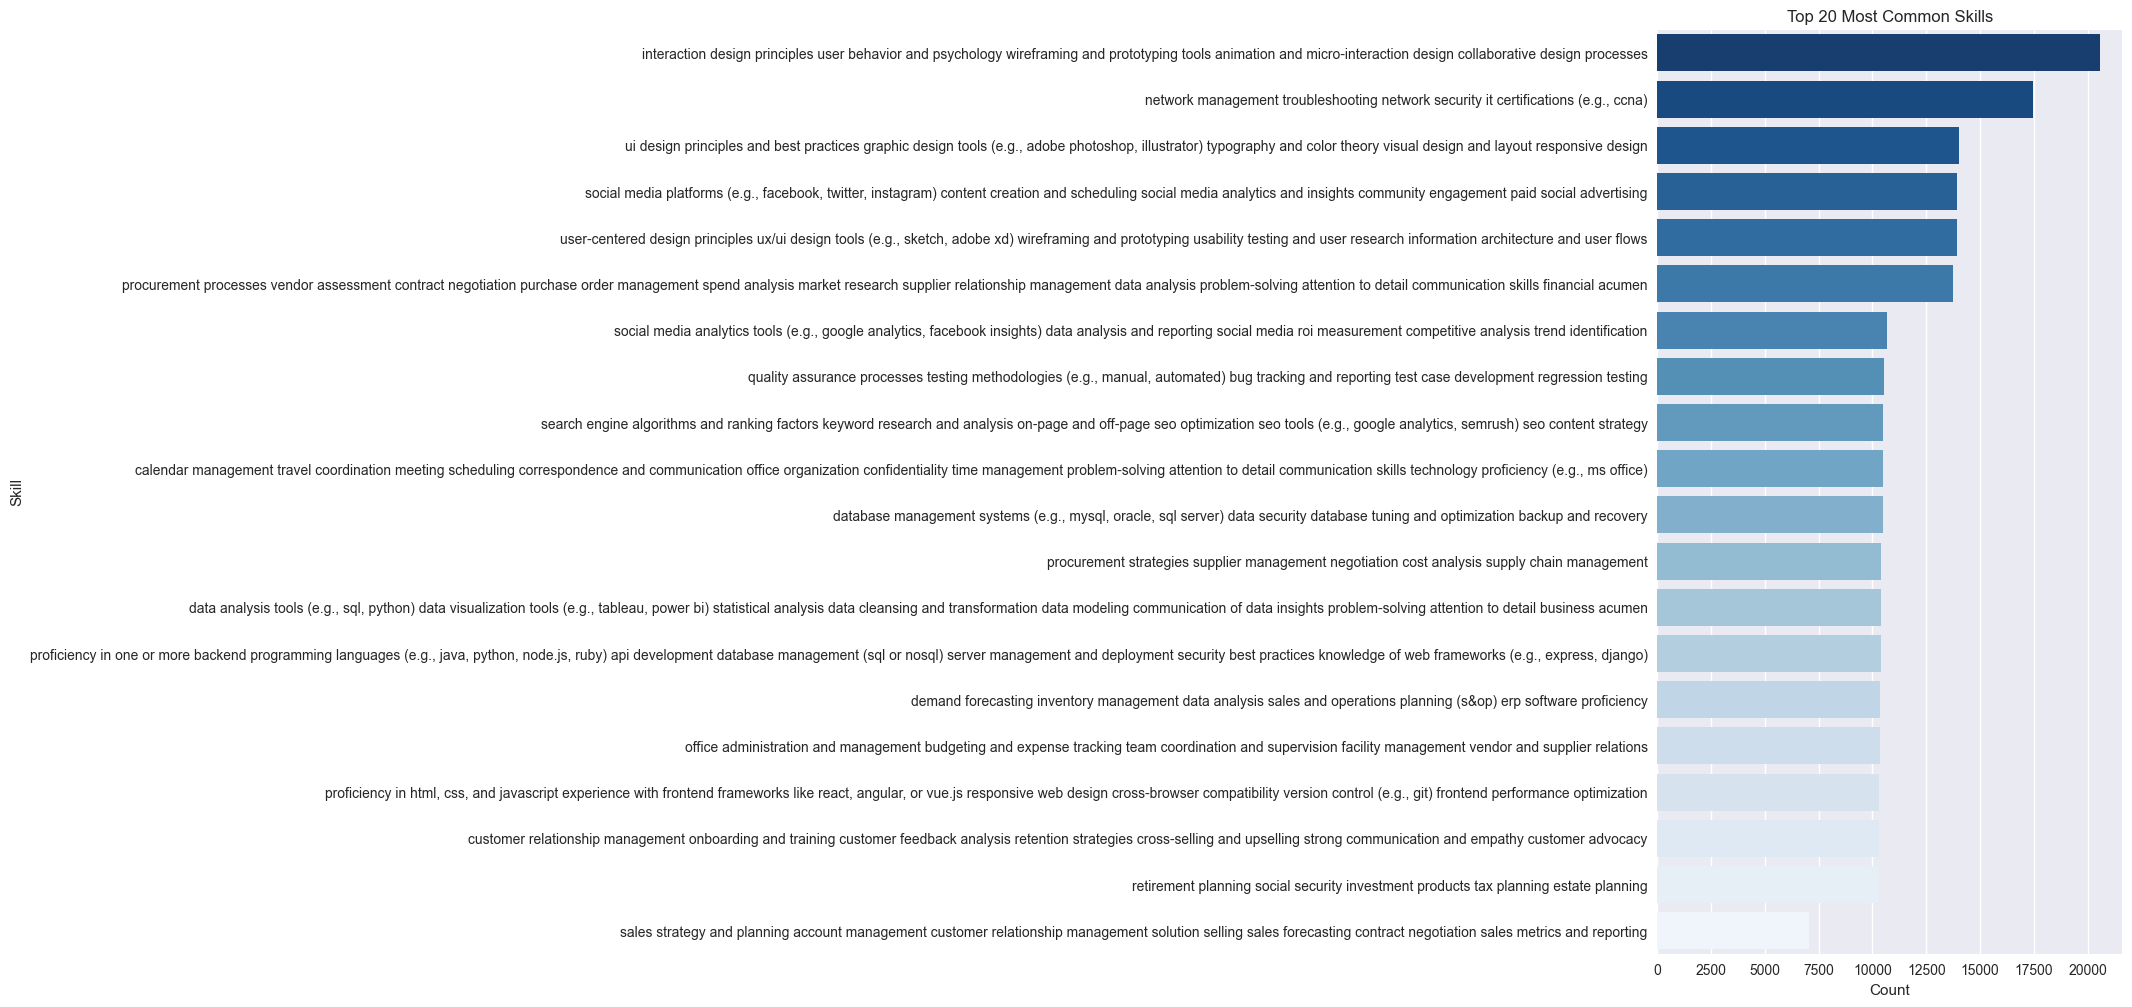

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20  # 
skill_counts = df_job["skills"].value_counts().head(top_n)

plt.figure(figsize=(6,12))
sns.barplot(y=skill_counts.index, x=skill_counts.values, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.title(f"Top {top_n} Most Common Skills")
plt.show()


In [16]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", " ", str(text))   # remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)      # keep only letters
    text = text.lower()                         # lowercase
    text = re.sub(r"\s+", " ", text)            # remove extra spaces
    return text.strip()

df_job["cleaned_description"] = df_job["Job Description"].apply(clean_text)
df_job["cleaned_skills"] = df_job["skills"].apply(clean_text)
df_job.head()

,Experience,Qualifications,latitude,longitude,Preference,Contact Person,Contact,Job Title,Job Portal,Job Description,skills,Responsibilities,Company,Company Profile,cleaned_description,cleaned_skills
0,5 to 15 Years,M.Tech,54.2361,-4.5481,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Snagajob,Social Media Managers oversee an organizations...,"social media platforms (e.g., facebook, twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",social media managers oversee an organizations...,social media platforms e g facebook twitter in...
1,2 to 12 Years,BCA,38.9697,59.5563,Female,Francisco Larsen,461-509-4216,Web Developer,Idealist,Frontend Web Developers design and implement u...,"html, css, javascript frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",frontend web developers design and implement u...,html css javascript frontend frameworks e g re...
2,0 to 12 Years,PhD,22.1987,113.5439,Male,Gary Gibson,9687619505,Operations Manager,Jobs2Careers,Quality Control Managers establish and enforce...,quality control processes and methodologies st...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",quality control managers establish and enforce...,quality control processes and methodologies st...
3,4 to 11 Years,PhD,9.3077,2.3158,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...",wireless network design and architecture wi-fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",wireless network engineers design implement an...,wireless network design and architecture wi fi...
4,1 to 12 Years,MBA,-35.6751,-71.5429,Female,Julie Johnson,343.975.4702x9340,Event Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,event planning conference logistics budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",a conference manager coordinates and manages c...,event planning conference logistics budget man...


In [17]:
df_job = df_job.drop_duplicates()
df_job

,Experience,Qualifications,latitude,longitude,Preference,Contact Person,Contact,Job Title,Job Portal,Job Description,skills,Responsibilities,Company,Company Profile,cleaned_description,cleaned_skills
0,5 to 15 Years,M.Tech,54.2361,-4.5481,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Snagajob,Social Media Managers oversee an organizations...,"social media platforms (e.g., facebook, twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",social media managers oversee an organizations...,social media platforms e g facebook twitter in...
1,2 to 12 Years,BCA,38.9697,59.5563,Female,Francisco Larsen,461-509-4216,Web Developer,Idealist,Frontend Web Developers design and implement u...,"html, css, javascript frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...",frontend web developers design and implement u...,html css javascript frontend frameworks e g re...
2,0 to 12 Years,PhD,22.1987,113.5439,Male,Gary Gibson,9687619505,Operations Manager,Jobs2Careers,Quality Control Managers establish and enforce...,quality control processes and methodologies st...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",quality control managers establish and enforce...,quality control processes and methodologies st...
3,4 to 11 Years,PhD,9.3077,2.3158,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...",wireless network design and architecture wi-fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",wireless network engineers design implement an...,wireless network design and architecture wi fi...
4,1 to 12 Years,MBA,-35.6751,-71.5429,Female,Julie Johnson,343.975.4702x9340,Event Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,event planning conference logistics budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",a conference manager coordinates and manages c...,event planning conference logistics budget man...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,0 to 12 Years,B.Tech,1.6508,10.2679,Both,Shawn Cortez,950-451-5843,Mechanical Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"mechanical engineering cad software (e.g., sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I...",mechanical design engineers create and develop...,mechanical engineering cad software e g solidw...
1615936,2 to 14 Years,M.Tech,51.9194,19.1451,Male,Steven Diaz,676.387.1572x71877,IT Manager,USAJOBS,An IT Director oversees an organizations IT de...,strategic it planning leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":...",an it director oversees an organizations it de...,strategic it planning leadership and managemen...
1615937,4 to 15 Years,BCA,38.9697,59.5563,Female,Bryan Morales,537.384.6193x5284,Mechanical Engineer,Indeed,Mechanical Design Engineers create and develop...,"mechanical engineering cad software (e.g., sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct...",mechanical design engineers create and develop...,mechanical engineering cad software e g solidw...
1615938,5 to 15 Years,BCA,12.2383,-1.5616,Female,Steven Dunn,(484)257-4755x5346,HR Coordinator,Stack Overflow Jobs,Training Coordinators design and implement emp...,training program coordination training materia...,"Coordinate employee training programs, track t...",Mahindra 

In [27]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText) 
    resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

requiredText = resumeDataSet['cleaned_resume'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [19]:
import pandas as pd
import numpy as np
WordFeatures_array = WordFeatures.toarray()
features_df = pd.DataFrame(WordFeatures_array, columns=word_vectorizer.get_feature_names_out())

# final_df = pd.concat([resumeDataSet[['Resume', 'cleaned_resume', 'Category']], features_df], axis=1)

# final_df.to_csv("data/cleaned/resume_features.csv", index=False)

# print("✅ الملف اتسيف: data/cleaned/resume_features.csv")


In [20]:
# import os

# os.makedirs("data/cleaned", exist_ok=True)
# df_half = df_job.sample(frac=0.5, random_state=42)
# df_half.to_csv("data/cleaned/job_descriptions_clean_half.csv", index=False)
# print("✅ اتسيف نص الداتا بس")


In [21]:
print(df_job.columns.tolist())


['Experience', 'Qualifications', 'latitude', 'longitude', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Job Portal', 'Job Description', 'skills', 'Responsibilities', 'Company', 'Company Profile', 'cleaned_description', 'cleaned_skills']


In [29]:
resumeDataSet.head(1)


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...


In [32]:


resumeDataSet.to_csv("data/cleaned/resume_pre.csv", index=False)

print("✅ الملف اتسيف: data/cleaned/resume_pre.csv")

✅ الملف اتسيف: data/cleaned/resume_pre.csv
